**Prerequisites**: 
    - numpy
    - straph
    - matplotlib
    - seaborn

# Stream Graph Generators

In this notebook we will show how to use different methods, implemented in **Straph**, to generate random stream graphs.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from straph import stream_graph as sg
from straph import generators as gen 

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)

Firstly, we must precise that the following methods may not be as intuitive as methods for random static graphs (Barabasi-Albert, Erdos-Renyi) but they are their equivalent for Stream Graphs.
The addition of a temporal dimension, continuous by nature, necessitate a mixture of continous random variable (coding nodes and links presence, for the temporal dimension) and discrete random variable (coding nodes and links occurence, for the structural dimension).

Our generator always takes the following parameters:
    - T : the time window of the stream graph
    - Occurence of a node (discrete variable)
    - Node presence (continuous or discrete variable)
    - Occurence of a link (discrete variable)
    - Link presence (continuous or discrete variable)

In [32]:
T = [0, 100]
nb_node = 12
occurrence_law_node = 'poisson'
presence_law_node = 'poisson'

occurrence_param_node = 4
presence_param_node = 15

occurrence_law_link = 'poisson'
presence_law_link = 'poisson'

occurrence_param_link = 2
presence_param_link = 5

# 1. Erdos Renyi

As for static graphs, this model takes a single parameter **p** which is the probability that two nodes are connected.

In [33]:
p_link = np.sqrt(nb_node)/nb_node

In [34]:
S = gen.erdos_renyi(T,
                    nb_node,
                    occurrence_law_node,
                    occurrence_param_node,
                    presence_law_node,
                    presence_param_node,
                    occurrence_law_link,
                    occurrence_param_link,
                    presence_law_link,
                    presence_param_link,
                    p_link)
S.describe()

Nb of Nodes :  12
Nb of segmented nodes :  26.0
Nb of links :  23
Nb of segmented links :  34.0


To plot the stream graph we use Straph's custom function (cf: the notebook drawing.ipynb).

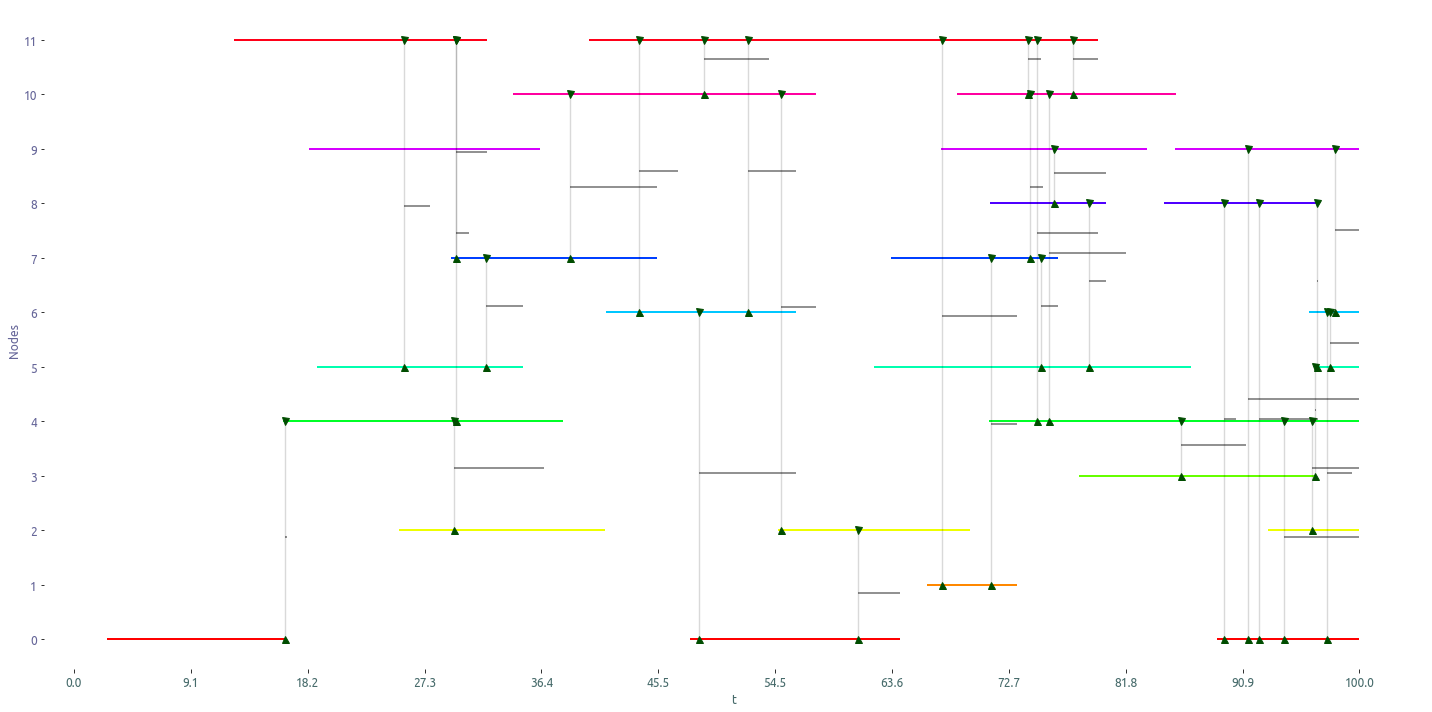

In [35]:
S.plot()

## 1.1 Degree distribution

In [37]:
T = [0, 1000]
nb_node = 2000
occurrence_law_node = 'poisson'
presence_law_node = 'poisson'

occurrence_param_node = 4
presence_param_node = 100

occurrence_law_link = 'poisson'
presence_law_link = 'poisson'

occurrence_param_link = 4
presence_param_link = 50


p_link = np.sqrt(nb_node)/nb_node

S = gen.erdos_renyi(T,
                    nb_node,
                    occurrence_law_node,
                    occurrence_param_node,
                    presence_law_node,
                    presence_param_node,
                    occurrence_law_link,
                    occurrence_param_link,
                    presence_law_link,
                    presence_param_link,
                    p_link)
S.describe()

Nb of Nodes :  2000
Nb of segmented nodes :  5523.0
Nb of links :  37956
Nb of segmented links :  65682.0


If we observe the degree distribution of these random stream graph we observe the same distribution as in erdos-renyi static graphs.

/home/leo/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


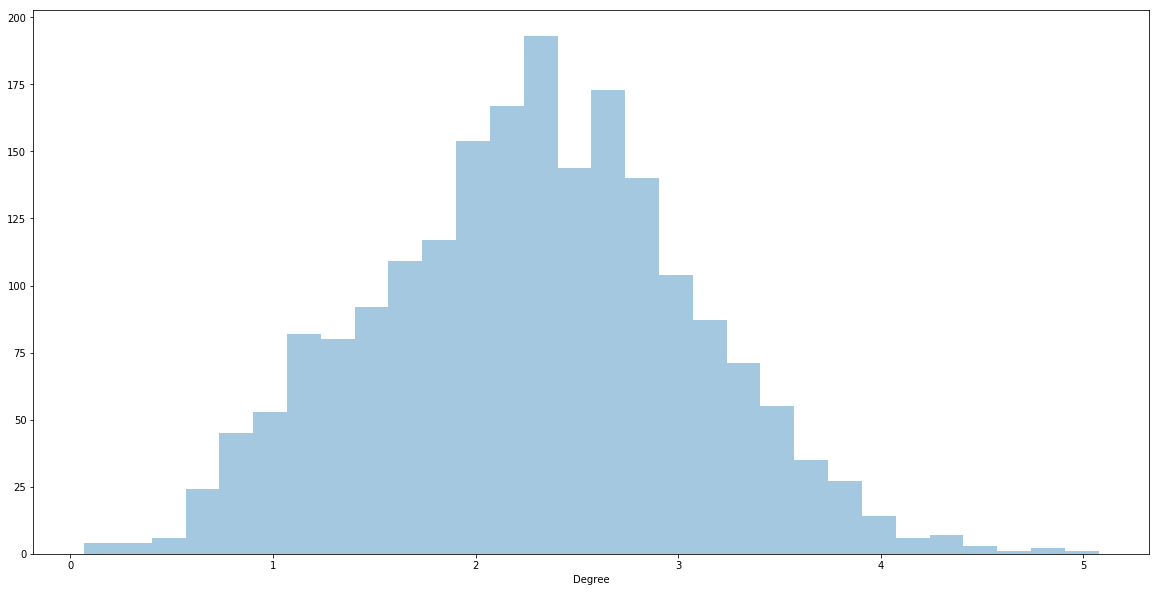

In [38]:
degrees = S.degrees()
sns.distplot(list(degrees.values()),axlabel= "Degree",kde=False)

If we plot the maximum instant degree we observe the same distribution as in erdos-renyi static graphs.

/home/leo/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


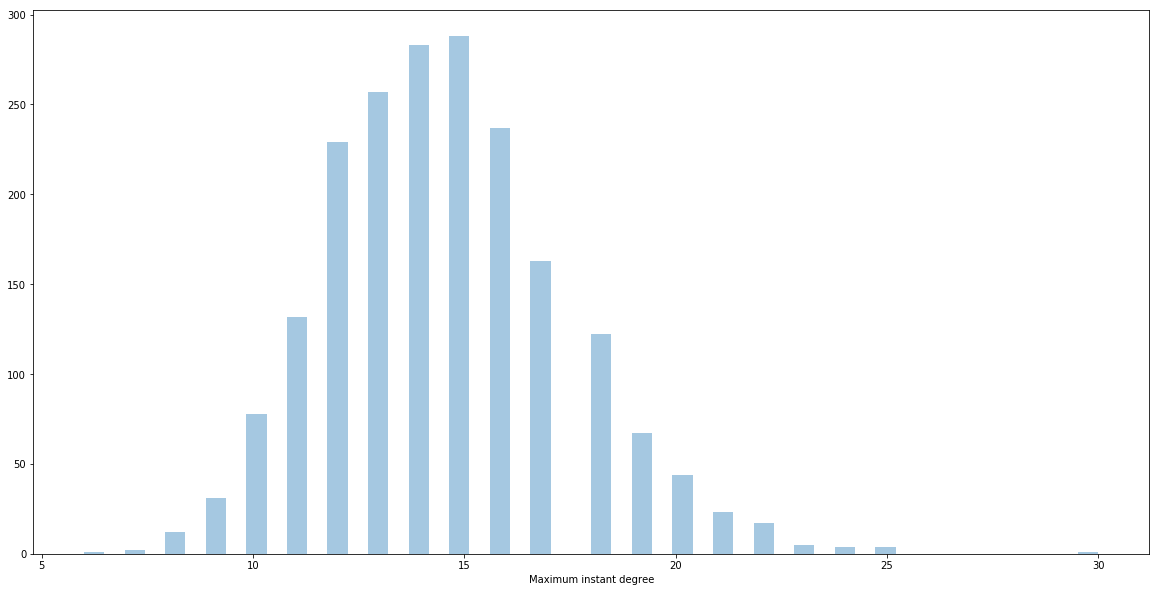

In [39]:
d_part = S.degrees_partition()
max_d = {}
for d, v in d_part.items():
    for u in v:
        max_d[u[2]] = d
fig = plt.figure()
sns.distplot(list(max_d.values()),axlabel= "Maximum instant degree",kde = False)

# 2. Barabasi Albert

As in static graph our Barabasi-Albert takes two parameters *m_0* the initial number of nodes and *m* the number of nodes that will be connected to a new node.

In [40]:
T = [0, 100]
nb_node = 12
occurrence_law_node = 'poisson'
presence_law_node = 'poisson'

occurrence_param_node = 4
presence_param_node = 15

occurrence_law_link = 'poisson'
presence_law_link = 'poisson'

occurrence_param_link = 2
presence_param_link = 5


m0 = 5
m = 4

In [41]:
S = gen.barabasi_albert(T,
                    nb_node,
                    occurrence_law_node,
                    occurrence_param_node,
                    presence_law_node,
                    presence_param_node,
                    occurrence_law_link,
                    occurrence_param_link,
                    presence_law_link,
                    presence_param_link,
                    m0,
                    m)
S.describe()

Nb of Nodes :  12
Nb of segmented nodes :  26.0
Nb of links :  31
Nb of segmented links :  46.0


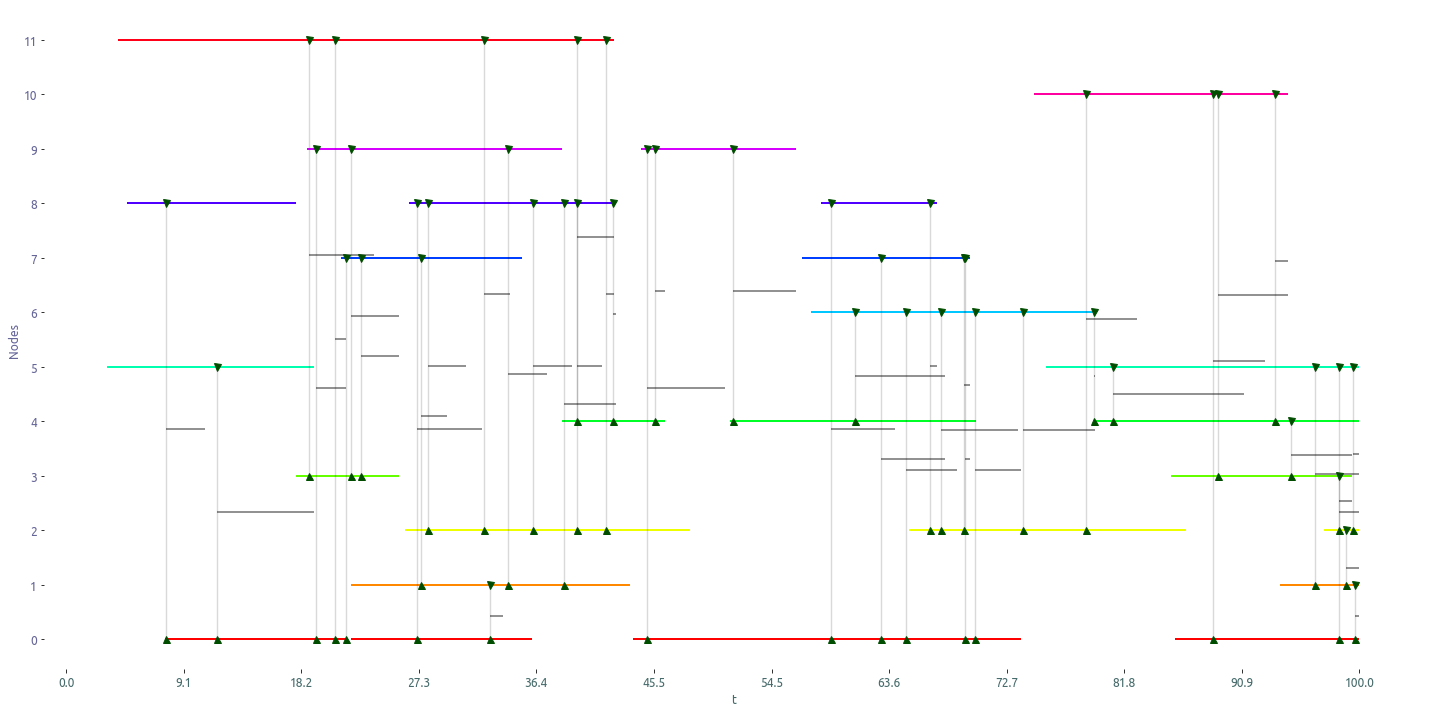

In [42]:
S.plot()

## 2.1 Degrees Distribution

In [48]:
T = [0, 1000]
nb_node = 2000
occurrence_law_node = 'poisson'
presence_law_node = 'poisson'

occurrence_param_node = 4
presence_param_node = 100

occurrence_law_link = 'poisson'
presence_law_link = 'poisson'

occurrence_param_link = 4
presence_param_link = 50


m0 = 10
m = 4

In [49]:
S = gen.barabasi_albert(T,
                    nb_node,
                    occurrence_law_node,
                    occurrence_param_node,
                    presence_law_node,
                    presence_param_node,
                    occurrence_law_link,
                    occurrence_param_link,
                    presence_law_link,
                    presence_param_link,
                    m0,
                    m)
S.describe()

Nb of Nodes :  2000
Nb of segmented nodes :  5611.0
Nb of links :  6847
Nb of segmented links :  12254.0


If we observe the degree distribution of these random stream graph we observe the same distribution as in barabasi-albert static graphs.

/home/leo/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


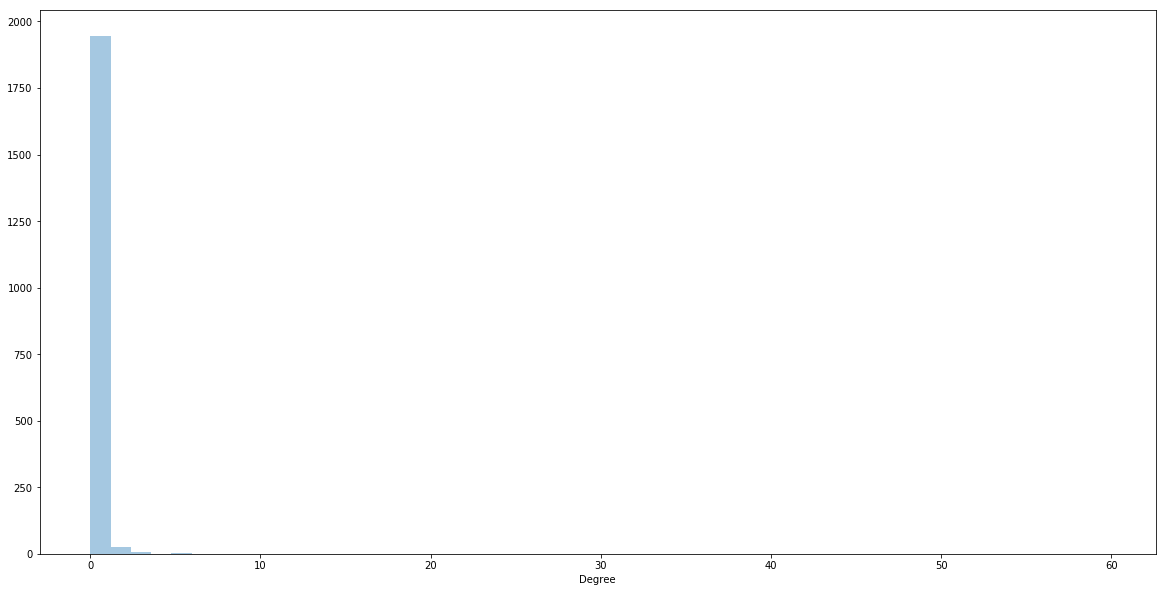

In [50]:
degrees = S.degrees()
sns.distplot(list(degrees.values()),axlabel= "Degree",kde=False)

We add a logscale on the number of values:

/home/leo/anaconda3/lib/python3.6/site-packages/matplotlib/ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "
/home/leo/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


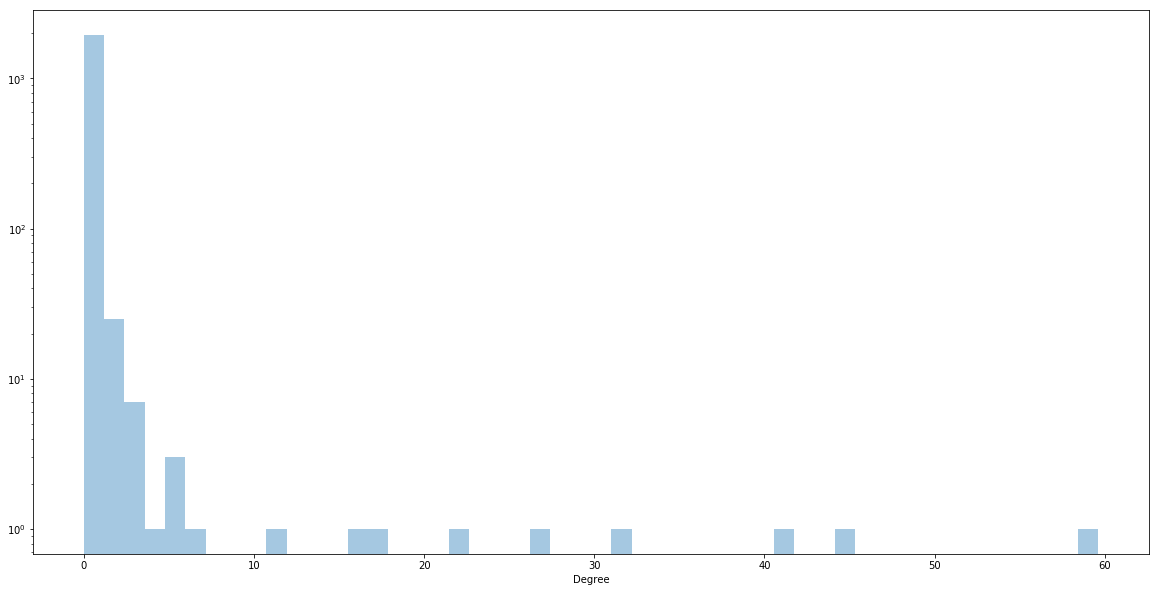

In [51]:
fig,ax =plt.subplots()
ax.set(yscale="log")
sns.distplot(list(degrees.values()),ax=ax,axlabel= "Degree",kde=False)

Similarly with the maximal instant degree:

/home/leo/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


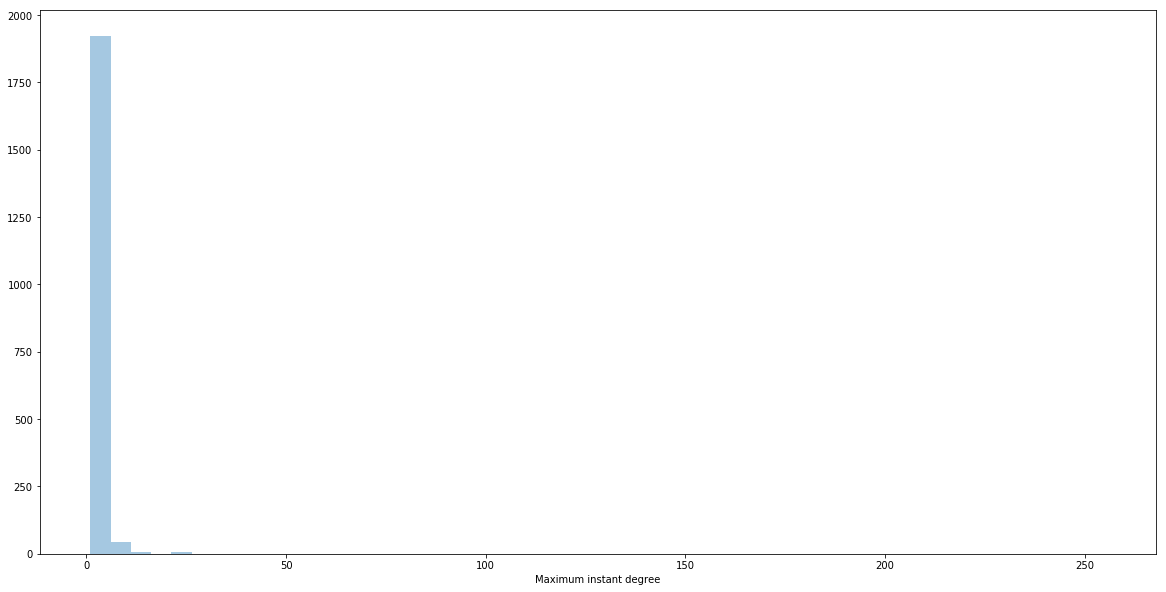

In [52]:
d_part = S.degrees_partition()
max_d = {}
for d, v in d_part.items():
    for u in v:
        max_d[u[2]] = d
fig = plt.figure()
sns.distplot(list(max_d.values()),axlabel= "Maximum instant degree",kde = False)

/home/leo/anaconda3/lib/python3.6/site-packages/matplotlib/ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "
/home/leo/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


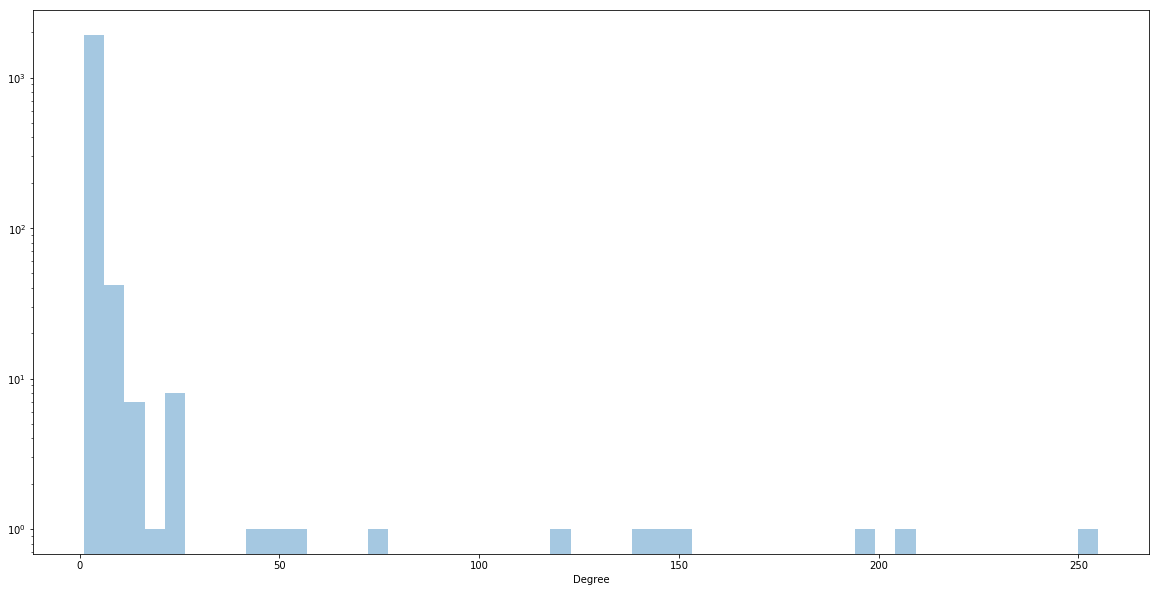

In [53]:
fig,ax =plt.subplots()
ax.set(yscale="log")
sns.distplot(list(max_d.values()),ax=ax,axlabel= "Degree",kde=False)